In [1]:
import os
#import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame 
import numpy as np
from matplotlib import pyplot as plt
import netCDF4
%matplotlib inline

In [2]:
if 'obelix' in os.uname()[1] or 'asterix' in os.uname()[1]:
    env = '/home/estimr2/nhempelmann'
else: 
    env = os.getenv('HOME')
    
DATA_DIR = os.path.join(env+'/data/euclia/ts_bc_cordex/')

In [3]:
# print env
# os.uname()

In [4]:
c_brit = [('PERROS-GUIREC', [-3.2823, 48.4933]),
          ('ROSTRENEN',[-3.1828, 48.1353]), 
          ('BRENNILIS',[-3.5107, 48.2137]),
          ('GUIPAVAS', [-4.2443, 48.2639]), 
          ('ILE-DE-BATZ', [-4.0043, 48.4447]),
          ('PLOGOFF',[-4.4355, 48.0220]),
          ('BLERUAIS',[-2.0727,48.0641]),
          ('ERBREE',[-1.0731,48.0556]),
          ('MEZIERES-SUR-COUESNON',[-1.2619,48.1831]),         
          ('AIGREFEUILLE-SUR-MAINE',[-1.2331,47.0359]),
          ('GUEMENE-PENFAO',[-1.4956,47.3759]),
          ('LA_HAIE-FOUASSIERE',[-1.2305,47.0943]),
          ('NOZAY',[-1.3637,47.3411]),
          ('PONTCHATEAU',[-2.0535,47.2635]),
          ('SAINT-PHILBERT-DE-GRAND-LIEU',[-1.3910,47.0145])]

c_nonsafran = [('AURAY',[47.3933,-2.5816]), 
               ('GROIX',[47.3908,-3.3008]), 
               ('QUEVEN',[47.4546,-3.2608])]

c_uk = [('Oxford_606',[-1.2625, 51.7607]),
        ('Rothamsted_471',[-0.3586,51.8062]),
        ('Wisley_719',[-0.4748,51.3103]),
        ('BognorRegis_782',[-0.6750,50.7810]),
        ('CambridgeBG_454',[0.1310,52.1930]),
        ('Eastbourne_808',[0.2850,50.7620]),
        ('EastMalling_744',[-0.4500,51.2870]),
        ('Goodhurst_742',[0.4610,51.0760]),
        ('Hampstead_695',[-0.1780,51.5600]),
        ('HamptonWWks_711',[-0.3780,51.4120]),
        ('Larkhill_888',[-1.8040,51.2010]),
        ('OtterbourneWWks_855',[-1.3340,51.0080]),
        ('WightShanklin_878',[-1.1790,50.6230]),
        ('Woburn_458',[-0.5950,52.0140])]

c_nor = [('CARPIQUET', [-0.2722,49.1048]), 
        
         ('SAINT-GATIEN-DES-BOIS', [0.1001 , 49.2152]),
         ('LES_ANDELYS', [1.2446, 49.1441]),
         ('CONCHES-EN-OUCHE',[0.5616, 48.5719]),
         ('GUICHAINVILLE',[1.1054,48.5837]),
         ('COULOUVRAY-BOISBENATRE',[-1.0606, 48.4707]),
         ('ALENCON',[0.0637 , 48.2644]),
         ('LE_PIN-AU-HARAS',[0.1051, 48.4330]),
         ('TANQUES',[-0.0444, 48.4031]), 
         ('FECAMP',[0.2209, 49.4602]),
         ('GODERVILLE',[0.2213, 49.3841]), 
         ('GOURNAY-EN-BRAY',[1.4259, 49.2841])]

c_southUK = [('Oxford_606',[-1.2625, 51.7607]),
       # ('Rothamsted_471',[-0.3586,51.8062]),
        ('Wisley_719',[-0.4748,51.3103]),
        ('BognorRegis_782',[-0.6750,50.7810]),
        ('CambridgeBG_454',[0.1310,52.1930]),
        ('Eastbourne_808',[0.2850,50.7620]),
        #('EastMalling_744',[-0.4500,51.2870]),
        #('Goodhurst_742',[0.4610,51.0760]),
        #('Hampstead_695',[-0.1780,51.5600]),
        ('HamptonWWks_711',[-0.3780,51.4120]),
        #('Larkhill_888',[-1.8040,51.2010]),
        ('OtterbourneWWks_855',[-1.3340,51.0080]),
#        ('WightShanklin_878',[-1.1790,50.6230]),
        ('Woburn_458',[-0.5950,52.0140])]

c_westFRA = [('PERROS-GUIREC', [-3.2823, 48.4933]),
          ('ROSTRENEN',[-3.1828, 48.1353]), 
          ('BRENNILIS',[-3.5107, 48.2137]),
          ('GUIPAVAS', [-4.2443, 48.2639]), 
          ('ILE-DE-BATZ', [-4.0043, 48.4447]),
          ('PLOGOFF',[-4.4355, 48.0220]),
          ('BLERUAIS',[-2.0727,48.0641]),
          ('ERBREE',[-1.0731,48.0556]),
          ('MEZIERES-SUR-COUESNON',[-1.2619,48.1831]),         
          ('AIGREFEUILLE-SUR-MAINE',[-1.2331,47.0359]),
          ('GUEMENE-PENFAO',[-1.4956,47.3759]),
          ('LA_HAIE-FOUASSIERE',[-1.2305,47.0943]),
          ('NOZAY',[-1.3637,47.3411]),
          ('PONTCHATEAU',[-2.0535,47.2635]),
          ('SAINT-PHILBERT-DE-GRAND-LIEU',[-1.3910,47.0145]), 
          ('ENGLESQUEVILLE-LA-PERCEE',[-0.5722 , 49.2312]), ]



In [5]:
ncs = [f for f in os.listdir(DATA_DIR) if f.endswith('nc')] # os.path.isfile(os.path.join(DATA_DIR,f) and
len(ncs)

854

In [6]:
from IPython.display import display, clear_output
import tempfile
import shutil
from cdo import *
cdo = Cdo()

In [7]:
# conda install statsmodels
#import statsmodels.api as sm
#import matplotlib.dates as mdates

#
#def fit_line2(x, y):
#    """Return slope, intercept of best fit line."""
#    X = sm.add_constant(x)
#    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
#    fit = model.fit()
#    return fit.params[1], fit.params[0]

In [8]:
vname = 'pr'
pr = DataFrame()
tmp_dir = tempfile.mkdtemp()

for n in ncs:
    try :
        print 'Preparing for %s ' % ( n )
        var = []
        temp = DataFrame()
        
        
        p1, tmp1 = tempfile.mkstemp(dir=tmp_dir, suffix='.nc')
        url = os.path.join(DATA_DIR,n)
        
        cdo.setcalendar('standard' , input=url, output=tmp1)
        
        nc = netCDF4.Dataset(tmp1)
        var = np.squeeze(nc.variables[vname])
        times = nc.variables['time']
        os.close( p1 )
        
        jd = np.squeeze(netCDF4.num2date(times[:], units=times.units, calendar=times.calendar))
            
        nc_name = n[n.index('_pr_') + 1 :].split('_')
        st_name = n[0:n.index('_pr_')]

        rcp = nc_name[1]# np.full((len(jd)), nc_name[1], dtype='|S10' )
        station = st_name# np.full((len(jd)), st_name, dtype='|S25')
        gcm = nc_name[2]# np.full((len(jd)), nc_name[2], dtype='|S25' )
        rcm = nc_name[3]# np.full((len(jd)), nc_name[3], dtype='|S25' )

        admin = 'default' #np.full((len(jd)),'default', dtype='|S10')
        for key in c_brit:
            if key[0] in st_name:  
                admin = 'Brittany' #np.full((len(jd)),'Brittany', dtype='|S10')
        for key in c_uk: 
            if key[0] in st_name:  
                admin = 'southUK'# np.full((len(jd)),'southUK', dtype='|S10')
        for key in c_nor: 
            if key[0] in st_name:  
                admin = 'Normandy' #np.full((len(jd)),'Normandy', dtype='|S10')
        for key in c_nonsafran: 
            if key[0] in st_name:  
                admin = 'non_SAFRAN' #np.full((len(jd)),'Normandy', dtype='|S10')
        
        region = 'NON' #np.full((len(jd)),'default', dtype='|S10')
        for key in c_southUK:
            if key[0] in st_name:  
                region = 'south_UK' #np.full((len(jd)),'Brittany', dtype='|S10')
        for key in c_westFRA: 
            if key[0] in st_name:  
                region = 'west_FRA'# np.full((len(jd)),'southUK', dtype='|S10')
        
        
        index_arrays = ['pr', rcp, region, admin, gcm, rcm, station] #np.array([region,station,gcm,rcm, jd]).tolist()
        mi = pd.MultiIndex.from_arrays(index_arrays, names=('var','rcp', 'region', 'admin','gcm','rcm','station'))
        temp = DataFrame(  var , index=jd, columns=mi)
        
        rs = temp.resample('BQ-NOV', how=sum)
        pr = pd.concat ((pr,rs[rs.index.month==2]), axis=1)
        
        clear_output(wait=True)
        
    except Exception as e:
        
        print 'failed for %s \n %s' % (n, e)
shutil.rmtree(tmp_dir, ignore_errors=True)        
print ' ***** Finished **** ' 

 ***** Finished **** 


In [10]:
pr = pr['1972':'2099'].reindex_axis(sorted(pr.columns), axis=1)
pr.index.name = 'Date'
pr.head()

var                           pr                               \
rcp                        rcp45                                
region                       NON                                
admin                   Normandy                                
gcm        CNRM-CERFACS-CNRM-CM5                                
rcm                         RCA4                                
station                  ALENCON   CARPIQUET CONCHES-EN-OUCHE   
Date                                                            
1972-02-29            208.383224  135.020279       193.580246   
1973-02-28            277.445953  159.234756       226.471130   
1974-02-28            308.693420  251.700668       350.732086   
1975-02-28            149.911194  139.876663       174.530624   
1976-02-27            156.624451  147.205109       174.964066   

var                                                                        \
rcp                                                                         
region                                                                      
admin                                                                       
gcm                                                                         
rcm                                                                         
station    COULOUVRAY-BOISBENATRE      FECAMP  GODERVILLE GOURNAY-EN-BRAY   
Date                                                                        
1972-02-29             184.790421  166.382812  190.643860      161.585953   
1973-02-28             295.108429  173.891098  197.639954      171.149719   
1974-02-28             357.821228  273.705811  309.464630      279.719421   
1975-02-28             214.330719  141.848984  161.574966      142.552856   
1976-02-27             208.078186  154.021637  173.904373      156.027222   

var                                                            ...             \
rcp                                                            ...              
region                                                         ...              
admin                                                          ...              
gcm                                                            ...              
rcm                                                            ...              
station    GUICHAINVILLE LES_ANDELYS LE_PIN-AU-HARAS           ...              
Date                                                           ...              
1972-02-29    141.570297  151.397400      212.818329           ...              
1973-02-28    168.238754  158.281128      276.458099           ...              
1974-02-28    242.865341  253.979065      357.274200           ...              
1975-02-28    120.572098  133.010895      174.757980           ...              
1976-02-27    136.567551  165.116257      184.758530           ...              

var                                                           \
rcp                           rcp85                            
region                     west_FRA                            
admin                       default                            
gcm                        CNRM-CM5           ICHEC-EC-EARTH   
rcm                   CNRM-ALADIN53                  HIRHAM5   
station    ENGLESQUEVILLE-LA-PERCEE ENGLESQUEVILLE-LA-PERCEE   
Date                                                           
1972-02-29               180.186844               175.265656   
1973-02-28               172.765427               174.349472   
1974-02-28               230.578979               215.948639   
1975-02-28               164.979080               104.609962   
1976-02-27               163.315216               189.051270   

var                                                           \
rcp                                                            
region                                                         
admin                                                          
gcm      

In [11]:
obs = pd.read_csv(os.path.join(env+'/data/euclia/allstations.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0])

In [12]:
# test.rename(columns={'test': 'test3'}, inplace=True)

# DataFrame.describe(percentile_width=None, percentiles=None, include=None, exclude=None)
# Brittany = Brittany.reindex_axis(sorted(Brittany.columns), axis=1)
# Brittany.sort(level='gcm', ascending=True, inplace=False, kind='quicksort')
# Brittany.head() # columns.levels[1]

In [13]:
len(obs.columns.values)

45

In [14]:
NUM_POSTE =  [ (14137001,'CARPIQUET'),(14239001,'ENGLESQUEVILLE-LA-PERCEE'),
              (14578001,'SAINT-GATIEN-DES-BOIS'),(22168001,'PERROS-GUIREC'),
              (22266001,'ROSTRENEN'),(27016001,'LES_ANDELYS'),
              (27165001,'CONCHES-EN-OUCHE'),(27306001,'GUICHAINVILLE'),
              (29018001,'BRENNILIS'),(29075001,'GUIPAVAS'),(29082001,'ILE-DE-BATZ'),
              (29168001,'PLOGOFF'),(50144001,'COULOUVRAY-BOISBENATRE'),
              (61001001,'ALENCON'),(61328001,'LE_PIN-AU-HARAS'),(61479001,'TANQUES'),
              (76259001,'FECAMP'),(76302002,'GODERVILLE'),(76312001,'GOURNAY-EN-BRAY'),
              (35026001,'BLERUAIS'),(35105001,'ERBREE'),(35178001,'MEZIERES-SUR-COUESNON'),
              (44002001,'AIGREFEUILLE-SUR-MAINE'),(44067001,'GUEMENE-PENFAO'),
              (44070001,'LA_HAIE-FOUASSIERE'),(44113001,'NOZAY'),(44129001,'PONTCHATEAU'),
              (44188001,'SAINT-PHILBERT-DE-GRAND-LIEU'),(56007001,'AURAY'),(56069001,'GROIX'),
              (56185001,'QUEVEN')]

ln = obs.columns
for name in ln: 
    if 'ID' in name:
        key = [item for item in NUM_POSTE if int(name.strip('ID')) in item]
        nn = key[0][1]
        obs.rename(columns={name: nn}, inplace=True)     

In [15]:
# Group observations to regions
# test = obs
#obs.head()
#obs.columns.values

In [16]:
r_arr = []
a_arr = []
for st_name in obs.columns.values: 

    admin = 'default' #np.full((len(jd)),'default', dtype='|S10')
    for key in c_brit:
        if key[0] in st_name:  
            admin = 'Brittany' #np.full((len(jd)),'Brittany', dtype='|S10')
    for key in c_uk: 
        if key[0] in st_name:  
            admin = 'southUK'# np.full((len(jd)),'southUK', dtype='|S10')
    for key in c_nor: 
        if key[0] in st_name:  
            admin = 'Normandy' #np.full((len(jd)),'Normandy', dtype='|S10')
    for key in c_nonsafran: 
        if key[0] in st_name:  
            admin = 'non_SAFRAN' #np.full((len(jd)),'Normandy', dtype='|S10')

    region = 'NON' #np.full((len(jd)),'default', dtype='|S10')
    for key in c_southUK:
        if key[0] in st_name:  
            region = 'south_UK' #np.full((len(jd)),'Brittany', dtype='|S10')
    for key in c_westFRA: 
        if key[0] in st_name:  
            region = 'west_FRA'# np.full((len(jd)),'southUK', dtype='|S10')
    r_arr.append(region)
    a_arr.append(admin)
    

In [17]:
index_arrays = [r_arr,a_arr, obs.columns.values] #np.array([region,station,gcm,rcm, jd]).tolist()
mi = pd.MultiIndex.from_arrays(index_arrays, names=('region', 'admin', 'station'))
#test.columns.names = mi
obs = DataFrame( obs.values  , index=obs.index, columns=mi)

In [18]:
rs = obs.resample('BQ-NOV', how=sum)
pr_obs = rs[rs.index.month==2]
pr_obs = pr_obs['1900':'2014'].reindex_axis(sorted(pr_obs.columns), axis=1)
pr_obs.index.name = 'Date'
pr_obs.head()

region          NON                                                           \
admin      Normandy                                                            
station     ALENCON CARPIQUET CONCHES-EN-OUCHE COULOUVRAY-BOISBENATRE FECAMP   
Date                                                                           
1900-02-28      NaN       NaN              NaN                    NaN    NaN   
1901-02-28      NaN       NaN              NaN                    NaN    NaN   
1902-02-28      NaN       NaN              NaN                    NaN    NaN   
1903-02-27      NaN       NaN              NaN                    NaN    NaN   
1904-02-29      NaN       NaN              NaN                    NaN    NaN   

region                                                           \
admin                                                             
station    GODERVILLE GOURNAY-EN-BRAY GUICHAINVILLE LES_ANDELYS   
Date                                                              
1900-02-28        NaN             NaN           NaN         NaN   
1901-02-28        NaN             NaN           NaN         NaN   
1902-02-28        NaN             NaN           NaN         NaN   
1903-02-27        NaN             NaN           NaN         NaN   
1904-02-29        NaN             NaN           NaN         NaN   

region                               ...               west_FRA  \
admin                                ...               Brittany   
station    LE_PIN-AU-HARAS           ...            ILE-DE-BATZ   
Date                                 ...                          
1900-02-28             NaN           ...                    NaN   
1901-02-28             NaN           ...                    NaN   
1902-02-28             NaN           ...                    NaN   
1903-02-27             NaN           ...                    NaN   
1904-02-29             NaN           ...                    NaN   

region                                                                   \
admin                                                                     
station    LA_HAIE-FOUASSIERE MEZIERES-SUR-COUESNON NOZAY PERROS-GUIREC   
Date                                                                      
1900-02-28                NaN                   NaN   NaN           NaN   
1901-02-28                NaN                   NaN   NaN           NaN   
1902-02-28                NaN                   NaN   NaN           NaN   
1903-02-27                NaN                   NaN   NaN           NaN   
1904-02-29                NaN                   NaN   NaN           NaN   

region                                                                 \
admin                                                                   
station    PLOGOFF PONTCHATEAU ROSTRENEN SAINT-PHILBERT-DE-GRAND-LIEU   
Date                                                                    
1900-02-28     NaN         NaN       NaN                          NaN   
1901-02-28     NaN         NaN       NaN                          NaN   
1902-02-28     NaN         NaN       NaN                          NaN   
1903-02-27     NaN         NaN       NaN                          NaN   
1904-02-29     NaN         NaN       NaN                          NaN   

region                               
admin                       default  
station    ENGLESQUEVILLE-LA-PERCEE  
Date                                 
1900-02-28                      NaN  
1901-02-28                      NaN  
1902-02-28                      NaN  
1903-02-27                      NaN  
1904-02-29                      NaN  

[5 rows x 45 columns]

In [19]:
pr_obs.to_csv(env+'/data/euclia/pr_obs.csv')
pr.to_csv(env+'/data/euclia/pr.csv')

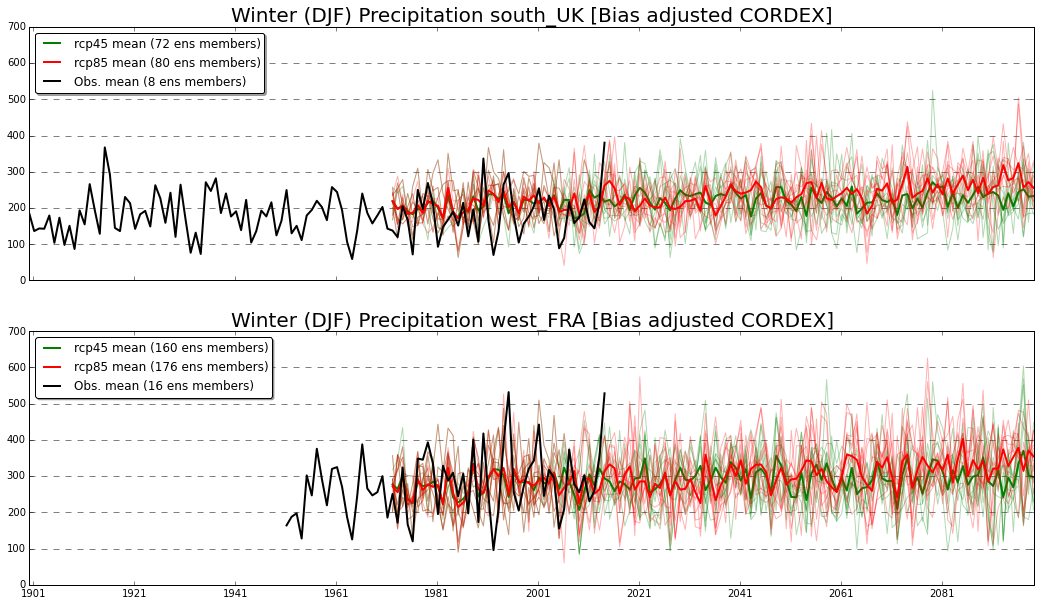

In [21]:

f, axarr = plt.subplots(2, sharex=True, figsize=(18, 10))
region = []
c=0 
for region in pr.columns.levels[2]: # 
    if ('south_UK' in region or 'west_FRA' in region):
        for rcp in pr.columns.levels[1]:
            if rcp == 'rcp45':
                color = 'green'
            if rcp == 'rcp85':
                color = 'red'    
               
            em = np.shape(pr.xs([region, rcp], level=['region','rcp'], axis=1))[1]
            axarr[c].plot(pr.index, pr.xs([region, rcp], level=['region','rcp'], axis=1).mean(axis=1), 
                          label= '%s mean (%i ens members)' % (rcp, em) , color=color, linewidth=2)
            for gcm in pr.columns.levels[4]:
                for rcm in pr.columns.levels[5]:
                    axarr[c].plot(pr.index, pr.xs([region, rcp, gcm, rcm], 
                                                  level=['region','rcp','gcm', 'rcm' ],
                                                  axis=1).mean(axis=1), color=color, alpha = 0.3 )

        em_obs = np.shape(pr_obs.xs([region], level=['region'], axis=1))[1]
        axarr[c].plot(pr_obs.index, pr_obs.xs([region], level=['region'], axis=1).mean(axis=1), c='black', 
                      label= 'Obs. mean (%i ens members)' % (em_obs) ,linewidth=2)

        axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True) # bbox_to_anchor=(1.1 , 1.00)
        axarr[c].set_title('Winter (DJF) Precipitation %s [Bias adjusted CORDEX]' % (region), fontsize=20)
        axarr[c].hlines(range(0,700,100), pr_obs.index[0], pr.index[-1], linestyle='--', alpha=0.5)
        axarr[c].set_ylim(0,700)
        # axarr[c].set_xlim(pr_obs.index[pr_obs.index.year == 1910],pr_obs.index[pr_obs.index.year == 2100])
        
        c=+1
        #axarr.set_title

In [ ]:
#fig = plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
f, axarr = plt.subplots(2, sharex=True, figsize=(18, 10))
region = []
c=0 
for region in pr.columns.levels[2]: # 
    if ('south_UK' in region or 'west_FRA' in region):
        for rcp in pr.columns.levels[1]:
            if rcp == 'rcp45':
                color = 'green'
            if rcp == 'rcp85':
                color = 'red'    
               
            em = np.shape(pr.xs([region, rcp], level=['region','rcp'], axis=1))[1]
            axarr[c].plot(pr.index, pr.xs([region, rcp], level=['region','rcp'], axis=1).mean(axis=1), 
                          label= '%s mean (%i ens members)' % (rcp, em) , color=color, linewidth=2)

            for gcm in pr.columns.levels[4]:
                for rcm in pr.columns.levels[5]:
                    axarr[c].plot(pr.index, pr.xs([region, rcp, gcm, rcm], 
                                                  level=['region','rcp','gcm', 'rcm' ],
                                                  axis=1).mean(axis=1), color=color, alpha = 0.3 )

        em_obs = np.shape(pr_obs.xs([region], level=['region'], axis=1))[1]
        axarr[c].plot(pr_obs.index, pr_obs.xs([region], level=['region'], axis=1).mean(axis=1), c='black', 
                      label= 'Obs. mean (%i ens members)' % (em_obs) ,linewidth=2)

        axarr[c].legend(loc='upper left', ncol=1, fancybox=True, shadow=True) # bbox_to_anchor=(1.1 , 1.00)
        axarr[c].set_title('Winter (DJF) Precipitation %s [Bias adjusted CORDEX]' % (region), fontsize=20)
        axarr[c].hlines(range(0,700,100), pr_obs.index[0], pr.index[-1], linestyle='--', alpha=0.5)
        axarr[c].set_ylim(0,700)
        axarr[c].set_xlim(pr_obs.index[pr_obs.index.year == 1910],pr_obs.index[pr_obs.index.year == 2100])
        
        c=+1
        #axarr.set_title

In [ ]:
#list(pr_obs.columns.levels)[2]
pr_obs.columns.get_level_values('station')

In [ ]:
#plt.plot(pr_obs['1910':'1920'].index, pr_obs['1910':'1920'].xs(['southUK'], level=['region'], axis=1), linewidth=2)

#for st in pr_obs.xs(['southUK'], level=['region'], axis=1).columns.values: 
#    if pr_obs['1910':'1920'].
#    print st
# env
#os.getenv('HOME')
add_path = os.getenv('HOME')+'/birdhouse/flyingpigeon/flyingpigeon/'
add_path

In [ ]:
# Returntimes 
import sys
sys.path.append(os.getenv('HOME')+'/birdhouse/flyingpigeon/flyingpigeon/')

import extremevents as ev
# reload(ev)


In [ ]:
#fig = plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
f, axarr = plt.subplots(1, 3, sharex=True, figsize=(20, 10))

for c, region  in  enumerate(pr.columns.levels[2]):
        
    obs = list(pr_obs['1955':'2014'].xs([region], level=['region'], axis=1).mean(axis=1).values )
    rl = ev.returnlevel(obs)
    
    axarr[c].plot(x,rl[2]) 
    axarr[c].fill_between(x,rl[1],rl[3], color = 'grey', alpha=0.5 )
    axarr[c].set_title('%s Observation return times' % (region), fontsize=20)
    axarr[c].set_ylim(300,900)
    axarr[c].set_xlim(-100,1000)